In [ ]:
!wget https://github.com/matomo-org/travis-scripts/raw/refs/heads/master/fonts/Verdana.ttf

--2025-01-04 10:09:24--  https://github.com/matomo-org/travis-scripts/raw/refs/heads/master/fonts/Verdana.ttf
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/matomo-org/travis-scripts/refs/heads/master/fonts/Verdana.ttf [following]
--2025-01-04 10:09:24--  https://raw.githubusercontent.com/matomo-org/travis-scripts/refs/heads/master/fonts/Verdana.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139640 (136K) [application/octet-stream]
Saving to: ‘Verdana.ttf’

Verdana.ttf         100%[===================>] 136.37K  --.-KB/s    in 0.1s    

2025-01-04 10:09:25 (1.20 MB/s) - ‘Verdana.ttf’ sav

In [ ]:
import seaborn as sns
from matplotlib import font_manager
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

font_path = 'Verdana.ttf'
font_manager.fontManager.addfont(font_path)
verdana_font = font_manager.FontProperties(fname=font_path)


<ipython-input-3-15cabba3dd82>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Scenario', y='Average Latency (ms)', data=df, notch=True, bootstrap=10000, palette=palette, linewidth=1, showmeans=True,  meanprops={'marker':'o','markerfacecolor':'red','markeredgecolor':'black','markersize':'4'})


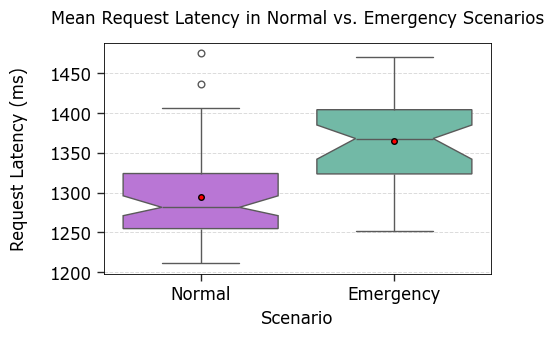

In [ ]:
# Load data from the first csv
df1 = pd.read_csv('latency_per_epoch_normal.csv', usecols=[1])
df1.columns = ['Average Latency (ms)']
df1['Scenario'] = 'Normal'

# Load data from the second csv
df2 = pd.read_csv('latency_per_epoch_emergency.csv', usecols=[1])
df2.columns = ['Average Latency (ms)']
df2['Scenario'] = 'Emergency'

df = pd.concat([df1, df2])

# Style
sns.set_theme(style='ticks', context='paper', font=verdana_font.get_name())
plt.figure(figsize=(5, 3))
palette = {'Normal': '#bf66e5', 'Emergency': '#66c5ac'}
plt.title('Mean Request Latency in Normal vs. Emergency Scenarios', fontsize=12, pad=14, color='black')
plt.xlabel('Scenario', fontsize=12, color='black')
plt.ylabel('Request Latency (ms)', fontsize=12, color='black', labelpad=16)
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)

# Create the boxplot with notches
sns.boxplot(x='Scenario', y='Average Latency (ms)', data=df, notch=True, bootstrap=10000, palette=palette, linewidth=1, showmeans=True,  meanprops={'marker':'o','markerfacecolor':'red','markeredgecolor':'black','markersize':'4'})

# Change the color and width of the frame
frame_color = 'black'
frame_width = 0.6

# Set the frame color and width for all spines (left, right, top, bottom)
for spine in plt.gca().spines.values():
    spine.set_edgecolor(frame_color)
    spine.set_linewidth(frame_width)

plt.savefig('latency_boxplot.pdf', format="pdf", bbox_inches = 'tight')
plt.show()

In [ ]:
# Compute other stats
import statistics
print("[Normal Scenario] Mean: ", statistics.mean(df1['Average Latency (ms)']))
print("[Emergency Scenario] Mean: ", statistics.mean(df2['Average Latency (ms)']))

print("[Normal Scenario] Median: ", statistics.median(df1['Average Latency (ms)']))
print("[Emergency Scenario] Median: ", statistics.median(df2['Average Latency (ms)']))

print("[Normal Scenario] Standard Deviation: ", statistics.stdev(df1['Average Latency (ms)']))
print("[Emergency Scenario] Standard Deviation: ", statistics.stdev(df2['Average Latency (ms)']))

# Compute difference in percentile between mean df1 and mean df2
mean_df1 = statistics.mean(df1['Average Latency (ms)'])
mean_df2 = statistics.mean(df2['Average Latency (ms)'])
diff = abs(mean_df1 - mean_df2) / mean_df1 * 100
print("Difference in percentile between mean df1 and mean df2: ", diff)

# Confidence interval around the median with boostrap
lst1 = df1['Average Latency (ms)']
ci1 = st.bootstrap((lst1,), np.median, confidence_level=0.95, n_resamples=10000).confidence_interval
print("Median: ", statistics.median(df1['Average Latency (ms)']), "Interval: ", ci1)

lst2 = df2['Average Latency (ms)']
ci2 = st.bootstrap((lst2,), np.median, confidence_level=0.95, n_resamples=10000).confidence_interval
print("Median: ", statistics.median(df2['Average Latency (ms)']), "Interval: ", ci2)


[Normal Scenario] Mean:  1294.62
[Emergency Scenario] Mean:  1364.94
[Normal Scenario] Median:  1281.5
[Emergency Scenario] Median:  1368.0
[Normal Scenario] Standard Deviation:  58.29722925470395
[Emergency Scenario] Standard Deviation:  54.652299837710586
Difference in percentile between mean df1 and mean df2:  5.4317096908745555
Median:  1281.5 Interval:  ConfidenceInterval(low=1270.5, high=1296.0)
Median:  1368.0 Interval:  ConfidenceInterval(low=1342.0, high=1385.0)


Mean:  30.137083236
Median:  29.304380000000002


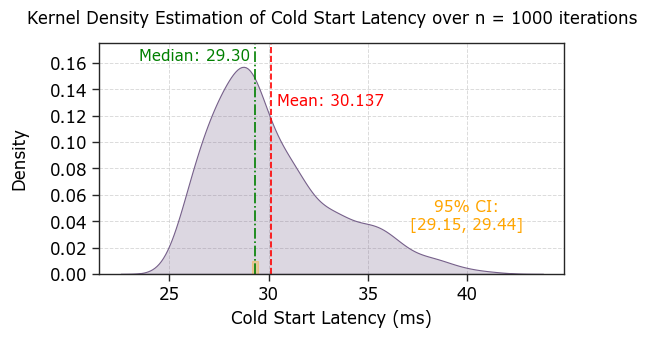

In [ ]:
# Create plot for cold start
df_cold_start = pd.read_csv('cold_start.csv')
df_cold_start.columns = ['Cold Start Latency (ms)']

# Style
sns.set_theme(style='ticks', context='paper', font=verdana_font.get_name())
plt.figure(figsize=(6, 3))
plt.title('Kernel Density Estimation of Cold Start Latency over n = 1000 iterations', fontsize=12, pad=14, color='black')
plt.xlabel('Cold Start Latency (ms)', fontsize=12, color='black')
plt.ylabel('Density', fontsize=12, color='black', labelpad=16)
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)

# Prepare Data
mean = df_cold_start['Cold Start Latency (ms)'].mean()
print("Mean: ", mean)
median = df_cold_start['Cold Start Latency (ms)'].median()
print("Median: ", median)

ci = st.bootstrap((df_cold_start['Cold Start Latency (ms)'],), np.median, confidence_level=0.95, n_resamples=10000).confidence_interval

ci_lower = ci[0]
ci_upper = ci[1]

plt.ylim(0, 0.175)

# Plot Data
sns.kdeplot(data=df_cold_start, color='#76608a', fill=True, x='Cold Start Latency (ms)')

# Add labels
plt.axvline(mean, color='red', linestyle='--', linewidth=1.2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='-.', linewidth=1.2, label=f'Median: {median:.2f}')
plt.fill_betweenx(
    y=[0, 0.01],
    x1=ci_lower,
    x2=ci_upper,
    color='orange',
    alpha=0.3,
    label=f'95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]'
)

# Add text near the lines
ylim = plt.gca().get_ylim()
plt.text(mean + 0.3, ylim[1] * 0.75, f'Mean: {mean:.3f}', color='red', fontsize=11, ha='left', va='center')
plt.text(median - 3.05, ylim[1] * 0.945, f'Median: {median:.2f}', color='green', fontsize=11, ha='center', va='center')
plt.text(40.0, ylim[1] * 0.25, f'95% CI:\n[{ci_lower:.2f}, {ci_upper:.2f}]',
         color='orange', fontsize=11, ha='center', va='center')

plt.savefig('cold_start_density.pdf', format="pdf", bbox_inches = 'tight')
plt.show()

Mean:  881.5501322959999
Median:  890.9380785000001


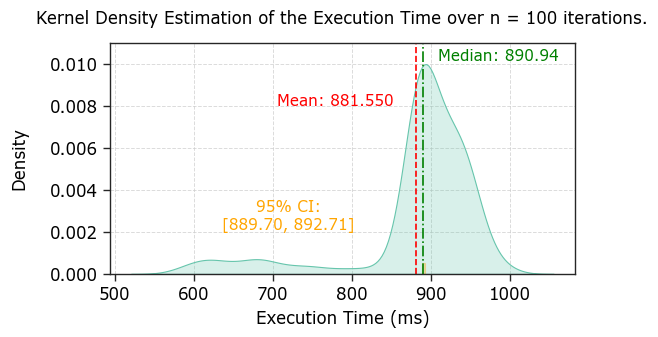

In [ ]:
# Create plot for execution times
df_cold_start = pd.read_csv('execution.csv')
df_cold_start.columns = ['Execution Time (ms)']

# Style
sns.set_theme(style='ticks', context='paper', font=verdana_font.get_name())
plt.figure(figsize=(6, 3))
plt.title('Kernel Density Estimation of the Execution Time over n = 100 iterations.', fontsize=12, pad=14, color='black')
plt.xlabel('Execution Time (ms)', fontsize=12, color='black')
plt.ylabel('Density', fontsize=12, color='black', labelpad=16)
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)

# Prepare Data
mean = df_cold_start['Execution Time (ms)'].mean()
print("Mean: ", mean)
median = df_cold_start['Execution Time (ms)'].median()
print("Median: ", median)

ci = st.bootstrap((df_cold_start['Execution Time (ms)'],), np.median, confidence_level=0.95, n_resamples=10000).confidence_interval

ci_lower = ci[0]
ci_upper = ci[1]

plt.ylim(0, 0.0110)

# Plot Data
sns.kdeplot(data=df_cold_start, color='#66c5ac', fill=True, x='Execution Time (ms)')

# Add labels
plt.axvline(mean, color='red', linestyle='--', linewidth=1.2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='-.', linewidth=1.2, label=f'Median: {median:.2f}')
plt.fill_betweenx(
    y=[0, 0.0005],
    x1=ci_lower,
    x2=ci_upper,
    color='orange',
    alpha=0.3,
    label=f'95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]'
)

# Add text near the lines
ylim = plt.gca().get_ylim()
plt.text(mean - 175.5, ylim[1] * 0.75, f'Mean: {mean:.3f}', color='red', fontsize=11, ha='left', va='center')
plt.text(median + 95.05, ylim[1] * 0.945, f'Median: {median:.2f}', color='green', fontsize=11, ha='center', va='center')
plt.text(720.0, ylim[1] * 0.25, f'95% CI:\n[{ci_lower:.2f}, {ci_upper:.2f}]',
         color='orange', fontsize=11, ha='center', va='center')

plt.savefig('execution_density.pdf', format="pdf", bbox_inches = 'tight')
plt.show()